In [2]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('29eaf3bcac23df4c6d025de157ab2d53beead3391fbe6e83b4ebcb6c')
pro = ts.pro_api()

import mpl_finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
from mylab.stock.myread import *
from mylab.stock.myfeature import *
from mylab.stock.myplot import *
from mylab.stock.my3point import *


In [4]:
SAVE_CSV = True
LOCAL = not True

GET_DAILY = True
SELECT_STOCK = True

start_date = "20100101"
end_date = "20200430"

# get all Stocks Info

In [5]:
#获取基础信息数据，包括股票代码、名称、上市日期、退市日期等
pool_df = getStockBasic(LOCAL = False,noSTKC = True, list_data = "20180101")
# pool_df = pd.read_csv("./data/stock/blue_stock_rank_3.csv" )

print('获得上市股票总数：', len(pool_df)-1)
pool_df.head()

获得上市股票总数： 2564


,ts_code,symbol,name,area,industry,market,exchange,list_status,list_date,delist_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,SZSE,L,19910403,None
1,000002.SZ,000002,万科A,深圳,全国地产,主板,SZSE,L,19910129,None
2,000004.SZ,000004,国农科技,深圳,生物制药,主板,SZSE,L,19910114,None
3,000005.SZ,000005,世纪星源,深圳,环境保护,主板,SZSE,L,19901210,None
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,SZSE,L,19920427,None


# conduct the policy

In [16]:
all_df = pd.read_csv("./output/select_ZT/result_policy3.csv")
all_df = all_df.loc[all_df.close.values < all_df.high.values,:]
print(all_df.shape)
all_df.head()

(58439, 100)


,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,...,sell_reason,earn_rate,earn_rate_per_day,win,low_pct,postday_high_pct,postday_open_pct,postday_close_pct,volume_rate,postday_volume_rate
2,20130226,000001.SZ,6.5640,7.2797,6.5276,6.9086,6.6303,0.2783,4.1974,1034814.73,...,not ZT,0.814926,0.814926,True,-1.548950,4.652173,0.767160,0.814926,1.679074,0.677103
5,20130816,000001.SZ,5.4446,6.0008,5.3537,5.6585,5.4553,0.2032,3.7248,2531434.45,...,not ZT,1.984625,1.984625,True,-1.862409,3.497393,-3.401962,1.984625,4.314284,0.626366
7,20131029,000001.SZ,7.0330,7.7016,7.0330,7.5518,7.0223,0.5295,7.5403,2141540.14,...,not ZT,1.983633,1.983633,True,0.152372,2.620567,-0.850128,1.983633,2.436994,0.619098
9,20141202,000001.SZ,7.9015,8.7216,7.8624,8.5393,7.9340,0.6053,7.6292,3490411.43,...,not ZT,-0.152237,-0.152237,False,-0.902445,5.869334,0.000000,-0.152237,0.781690,1.145289
11,20150827,000001.SZ,8.0032,8.5861,7.7669,8.5073,7.8063,0.7010,8.9799,1849235.65,...,not ZT,0.277409,0.277409,True,-0.504721,2.685929,0.833402,0.277409,0.742093,0.869565


In [19]:
# 买入应该是会以最高价买入
all_df["buy_price"] = all_df["high"] 
all_df["earn_rate"] = (all_df["sell_price"]/all_df["buy_price"]-1)*100
all_df["earn_rate_per_day"] = all_df["earn_rate"]/all_df["hold_period"]
all_df["win"] = all_df["earn_rate"] > 0
all_df["earn_rate_open"] = all_df["postday_open"]/all_df["buy_price"]
all_df["earn_rate_close"] = all_df["postday_close"]/all_df["buy_price"]


In [48]:
all_df.columns.values

array(['trade_date', 'ts_code', 'name', 'close', 'pct_chg', 'amp',
       'fc_ratio', 'fl_ratio', 'fd_amount', 'first_time', 'last_time',
       'open_times', 'strth', 'limit', 'open', 'high', 'low', 'pre_close',
       'change', 'vol', 'amount', 'turnover_rate', 'volume_ratio',
       'trade_date_stamp', 'K', 'D', 'J', 'kdj_signal', 'sema', 'lema',
       'dif', 'dea', 'macd', 'macd_signal', 'close_weekly', 'open_weekly',
       'high_weekly', 'low_weekly', 'pre_close_weekly', 'change_weekly',
       'pct_chg_weekly', 'vol_weekly', 'amount_weekly', 'K_weekly',
       'D_weekly', 'J_weekly', 'kdj_signal_weekly', 'sema_weekly',
       'lema_weekly', 'dif_weekly', 'dea_weekly', 'macd_weekly',
       'macd_signal_weekly', 'close_monthly', 'open_monthly',
       'high_monthly', 'low_monthly', 'pre_close_monthly',
       'change_monthly', 'pct_chg_monthly', 'vol_monthly',
       'amount_monthly', 'K_monthly', 'D_monthly', 'J_monthly',
       'kdj_signal_monthly', 'sema_monthly', 'lema_month

(-10.5, -8.0)

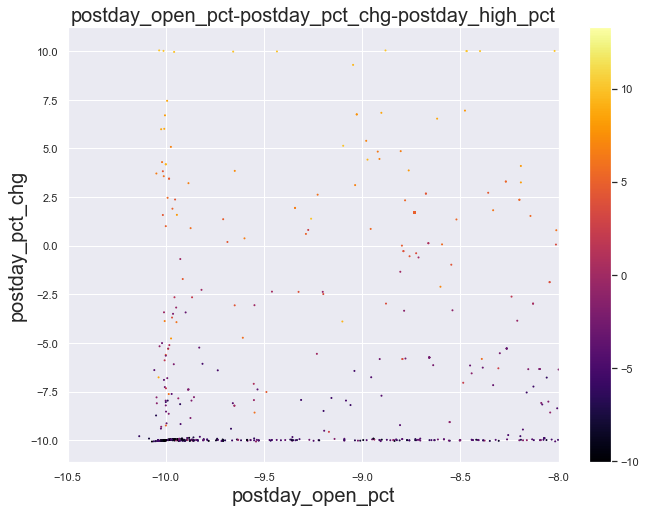

In [27]:
from mylab.pdplot.myplot import *
myScatter(all_df, col1 = "postday_open_pct", col2 = "postday_pct_chg", color = "postday_high_pct", save_dir = "./temp/")
# plt.ylim(-10.5,10.5)
plt.xlim(-10.5,-8.0)

In [162]:
temp_df = all_df.loc[all_df.open_times.values == 4,:] 
# temp_df = temp_df.loc[temp_df.postday_open_pct.values > -5,:] 
# temp_df = temp_df.loc[temp_df.preday_pct_chg.values < 9,:] 
temp_df = temp_df.dropna(axis=0,subset = ["earn_rate"]) 
np.mean(temp_df.earn_rate.values)

-0.37937653119954634

In [8]:
def myAgg(df, groupby , agg_param):
    u = df.groupby(groupby).agg(agg_param)
    u.columns = [groupby + '_' + col for col in u.columns.values]
    u.reset_index(inplace=True)
    return u

(130, 7)


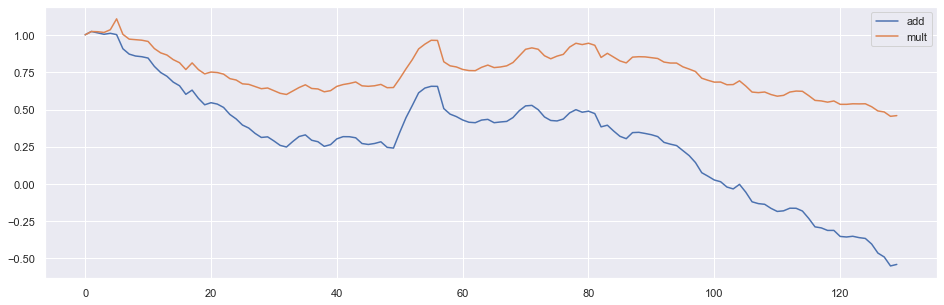

In [14]:
from functools import reduce  
# temp_df = all_df.loc[all_df.hold_period.values !=1,:] 
agg_param = {"earn_rate":np.mean,"earn_rate_per_day":np.mean,"earn_rate_open":np.mean,"earn_rate_close":np.mean,"postday_open_pct":np.mean}
data_df = myAgg(all_df,"trade_date",agg_param)
data_df["earn_rate_add1"] = (data_df["trade_date_earn_rate_close"]+100)/100
data_df["trade_date"] = data_df["trade_date"].astype(str)
data_df = data_df.loc[data_df.trade_date.values > "20191018",:] 

a = [1+reduce(lambda x, y: x+y, data_df.trade_date_earn_rate_per_day.values[:i+1]/100) for i in range(len(data_df))] # len(data_df)
b = [reduce(lambda x, y: x*y, data_df.earn_rate_add1.values[:i+1]) for i in range(len(data_df))] # len(data_df)
print(data_df.shape)
plt.figure(figsize=(16,5))
plt.plot(a)
plt.plot(b)
plt.legend(["add","mult"])
plt.show()

(129, 6)


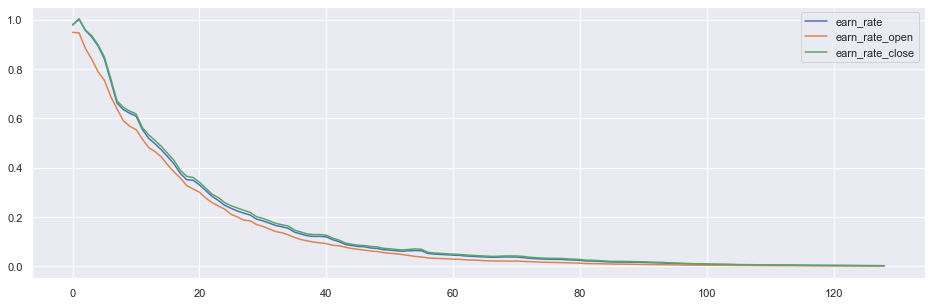

In [21]:
# sell it at open
# all_df["earn_rate_open"] = (all_df["postday_open"])/all_df["buy_price"]
# all_df["earn_rate_close"] = (all_df["postday_close"])/all_df["buy_price"]

agg_param = {"earn_rate":np.mean,"earn_rate_per_day":np.mean,"earn_rate_open":np.mean,"earn_rate_close":np.mean}
data_df = myAgg(all_df,"trade_date",agg_param)
data_df["earn_rate_add1"] = (data_df["trade_date_earn_rate_per_day"]+100)/100
data_df["trade_date"] = data_df["trade_date"].astype(str)
data_df = data_df.loc[data_df.trade_date.values > "20191018",:] 

a = [reduce(lambda x, y: x*y, data_df.earn_rate_add1.values[:i+1]) for i in range(len(data_df))] # len(data_df)
b = [reduce(lambda x, y: x*y, data_df.trade_date_earn_rate_open.values[:i+1]) for i in range(len(data_df))] # len(data_df)
c = [reduce(lambda x, y: x*y, data_df.trade_date_earn_rate_close.values[:i+1]) for i in range(len(data_df))] # len(data_df)
print(data_df.shape)
plt.figure(figsize=(16,5))
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.legend(["earn_rate","earn_rate_open","earn_rate_close"])
plt.show()

In [ ]:
all_df.shape[0]/data_df.shape[0]

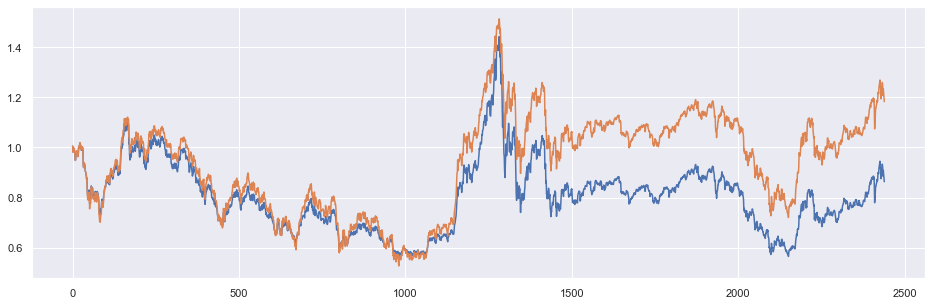

In [57]:
from mylab.stock.myread import getIndexDaily
index_df = getIndexDaily("399001.SZ", "20100303")
index_df["pct_chg_add1"] = (index_df["pct_chg"]+100)/100
b = [reduce(lambda x, y: x*y, index_df.pct_chg_add1.values[:i+1]) for i in range(len(index_df))] # len(data_df)
a = [1+reduce(lambda x, y: x+y, index_df.pct_chg.values[:i+1]/100) for i in range(len(index_df))] # len(data_df)
plt.figure(figsize=(16,5))
plt.plot(b)
plt.plot(a)